In [1]:
# 染色体末端reads索引问题示例

# 假设情况：
chromosome_length = 200000000  # 染色体长度 200Mb
resolution = 100000           # 分辨率 100kb

# 计算矩阵大小的方法：
ngene = int(chromosome_length // resolution) + 1
print(f"染色体长度: {chromosome_length:,} bp")
print(f"分辨率: {resolution:,} bp") 
print(f"计算的矩阵大小 (ngene): {ngene}")
print(f"有效索引范围: 0 到 {ngene-1}")
print()

# 问题场景：接近染色体末端的reads
print("=== 问题场景分析 ===")

# 场景1: 正好在染色体末端的read
end_position = 199999999  # 接近染色体末端的位置
matrix_index = end_position // resolution
print(f"末端位置: {end_position:,} bp")
print(f"转换为矩阵索引: {matrix_index}")
print(f"是否超出范围: {matrix_index >= ngene} (索引 {matrix_index} >= 矩阵大小 {ngene})")
print()

# 场景2: 真正的染色体末端
true_end_position = chromosome_length - 1  # 染色体的最后一个碱基
matrix_index_true_end = true_end_position // resolution
print(f"真正末端位置: {true_end_position:,} bp")
print(f"转换为矩阵索引: {matrix_index_true_end}")
print(f"是否超出范围: {matrix_index_true_end >= ngene}")
print()

# 场景3: 超出染色体长度的异常reads（可能由于测序错误）
abnormal_position = 200000050  # 超出染色体长度的异常位置
matrix_index_abnormal = abnormal_position // resolution
print(f"异常位置: {abnormal_position:,} bp (超出染色体长度)")
print(f"转换为矩阵索引: {matrix_index_abnormal}")
print(f"是否超出范围: {matrix_index_abnormal >= ngene}")
print()

print("=== 为什么会发生这种情况? ===")
print("1. Hi-C实验中的reads可能映射到染色体的最末端")
print("2. 参考基因组的注释可能与实际数据略有差异")
print("3. 测序过程中可能产生超出参考基因组范围的reads")
print("4. 整数除法的特性导致边界情况")

# 演示整数除法的边界效应
print("\n=== 整数除法边界效应 ===")
for pos in range(199900000, 200000001, 25000):
    idx = pos // resolution
    in_range = idx < ngene
    print(f"位置 {pos:>9,} -> 索引 {idx:>4} -> 在范围内: {in_range}")

染色体长度: 200,000,000 bp
分辨率: 100,000 bp
计算的矩阵大小 (ngene): 2001
有效索引范围: 0 到 2000

=== 问题场景分析 ===
末端位置: 199,999,999 bp
转换为矩阵索引: 1999
是否超出范围: False (索引 1999 >= 矩阵大小 2001)

真正末端位置: 199,999,999 bp
转换为矩阵索引: 1999
是否超出范围: False

异常位置: 200,000,050 bp (超出染色体长度)
转换为矩阵索引: 2000
是否超出范围: False

=== 为什么会发生这种情况? ===
1. Hi-C实验中的reads可能映射到染色体的最末端
2. 参考基因组的注释可能与实际数据略有差异
3. 测序过程中可能产生超出参考基因组范围的reads
4. 整数除法的特性导致边界情况

=== 整数除法边界效应 ===
位置 199,900,000 -> 索引 1999 -> 在范围内: True
位置 199,925,000 -> 索引 1999 -> 在范围内: True
位置 199,950,000 -> 索引 1999 -> 在范围内: True
位置 199,975,000 -> 索引 1999 -> 在范围内: True
位置 200,000,000 -> 索引 2000 -> 在范围内: True


In [19]:
import h5py
import numpy as np
import umap
import matplotlib.pyplot as plt

# 读取数据
mode = 'pad1_std1_rp0.5_sqrtvc'
with h5py.File(f'/cluster/home/Kangwen/dream/genoformer/re_scHicluster/test/merged_embed_matrix/embed_merged_pad1_std1_rp0.5_sqrtvc.svd20.hdf5', 'r') as f:
    matrix_reduce = f['data'][()]

# 运行UMAP
ndim = 15
reducer = umap.UMAP(n_neighbors=50, random_state=0, n_jobs=-1)
cell_embeddings = reducer.fit_transform(matrix_reduce[:, :ndim])



/cluster/home/Kangwen/anaconda3/envs/ckw/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/cluster/home/Kangwen/anaconda3/envs/ckw/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
import pandas as pd
import os
filelist = pd.read_csv('/cluster/home/Kangwen/dream/genoformer/re_scHicluster/code/filelist.txt', header=None)
label = [os.path.basename(x).split('.')[0].split('_')[1] for x in filelist[0].tolist()]
# label

/cluster/home/Kangwen/anaconda3/envs/ckw/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


NameError: name 'fh_model' is not defined

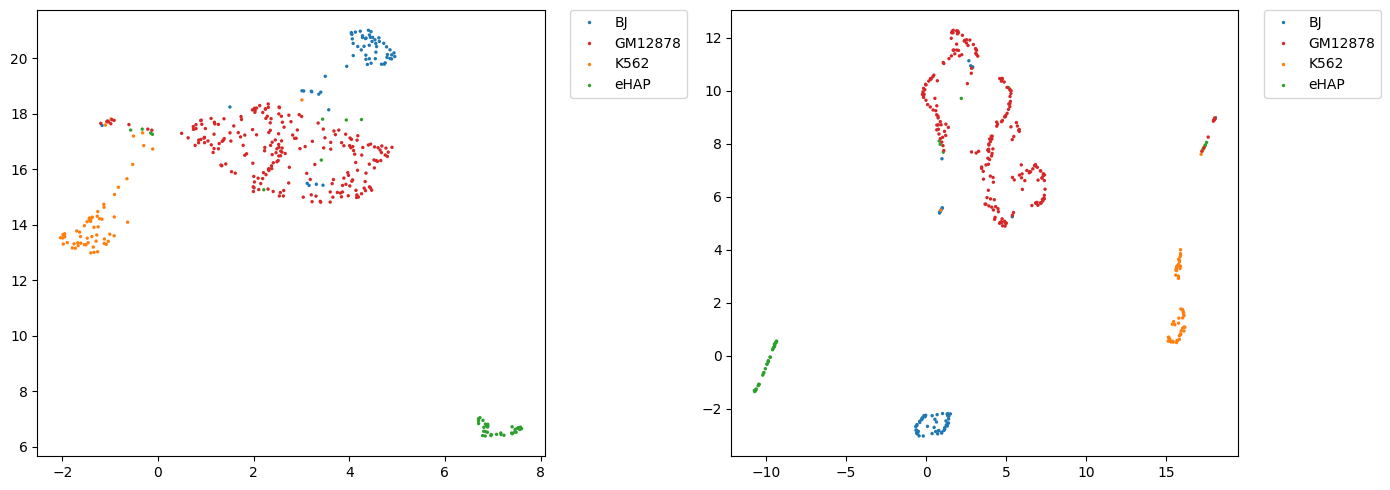

In [21]:
from umap import UMAP
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
filelist = pd.read_csv('/cluster/home/Kangwen/dream/genoformer/re_scHicluster/code/filelist.txt', header=None)
label = [os.path.basename(x).split('.')[0].split('_')[1] for x in filelist[0].tolist()]
cell_type = label
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = cell_embeddings
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
# plt.savefig(fh_model.config['data_dir'] + "/fasthigashi_embedding.png")
plt.show()